In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_classification, make_circles
from sklearn.cluster import AgglomerativeClustering, Birch, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn import cluster, datasets, mixture

## Agnes

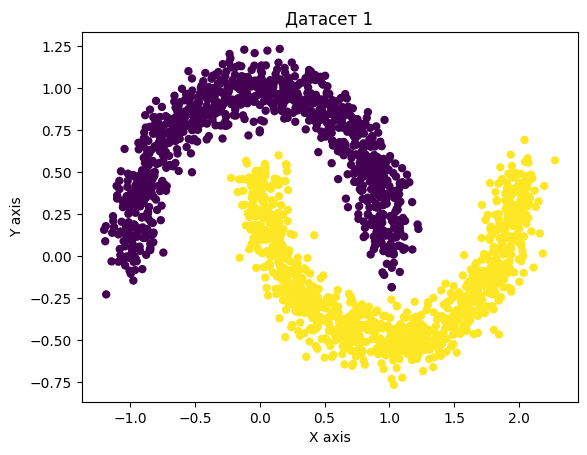

In [13]:
X1, Y1 = datasets.make_moons(n_samples=2000, noise=.09,random_state=10)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25)
plt.scatter(X1[:, 0], X1[:, 1], s=10, c=Y1)
plt.title('Датасет 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

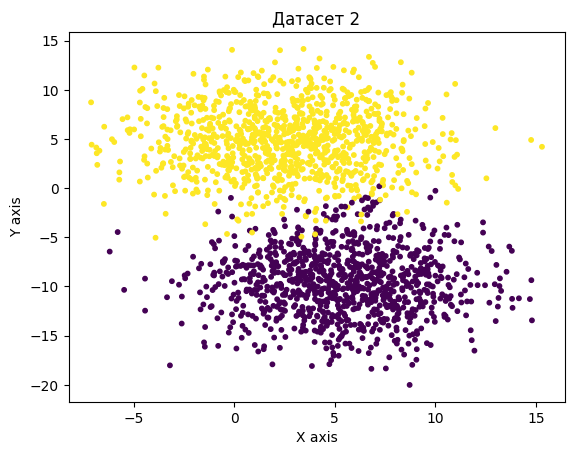

In [17]:
from sklearn.datasets import make_blobs
X2,Y2 = make_blobs(n_samples=2000,cluster_std=3.5,centers=2, n_features=2,random_state=10)
plt.title('Датасет 2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.scatter(X2[:, 0], X2[:, 1], s=10, c=Y2)
plt.show()

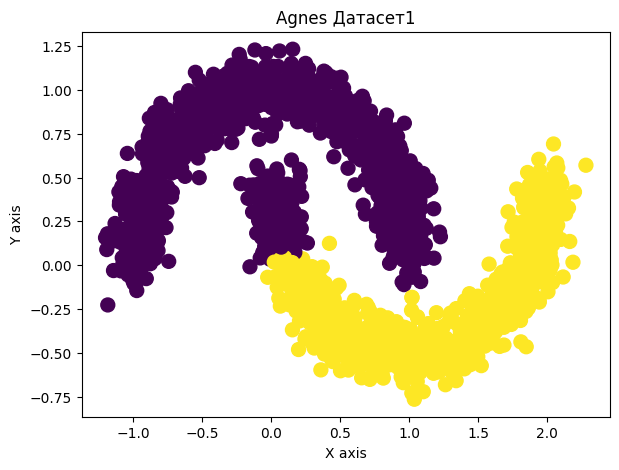

In [14]:
from sklearn.cluster import AgglomerativeClustering
agnes_1 = AgglomerativeClustering(n_clusters=2)
y_agnes_1 = agnes_1.fit_predict(X1)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_agnes_1)
plt.title('Agnes Датасет1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In [18]:
agnes_2 = AgglomerativeClustering(n_clusters=2)
y_agnes_2 = agnes_2.fit_predict(X2)

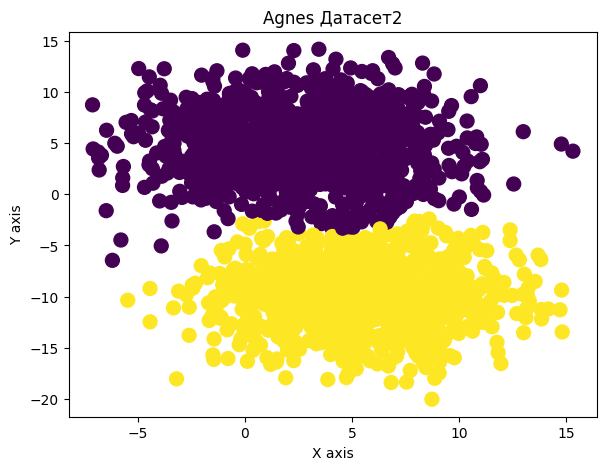

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
plt.scatter(X2[:, 0], X2[:, 1], s=100, c=y_agnes_2)
plt.title('Agnes Датасет2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In [20]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
silhouette_1 = silhouette_score(X1, y_agnes_1)
ari_1 = adjusted_rand_score(Y1, y_agnes_1)
nmi_1 = normalized_mutual_info_score(Y1, y_agnes_1)
print(f"Датасет 1 - Silhouette Coefficient: {silhouette_1:.3f}")
print(f"Датасет 1 - ARI: {ari_1:.3f}")
print(f"Датасет 1 - NMI: {nmi_1:.3f}")

Датасет 1 - Silhouette Coefficient: 0.406
Датасет 1 - ARI: 0.716
Датасет 1 - NMI: 0.671


In [21]:
silhouette_2 = silhouette_score(X2, y_agnes_2)
ari_2 = adjusted_rand_score(Y2, y_agnes_2)
nmi_2 = normalized_mutual_info_score(Y2, y_agnes_2)
print(f"Датасет 2 - Silhouette Coefficient: {silhouette_2:.3f}")
print(f"Датасет 2 - ARI: {ari_2:.3f}")
print(f"Датасет 2 - NMI: {nmi_2:.3f}")

Датасет 2 - Silhouette Coefficient: 0.588
Датасет 2 - ARI: 0.908
Датасет 2 - NMI: 0.843


# Висновок по результатам кластеризації двох датасетів за допомогою Agglomerative Clustering

## Датасет 1:
1. **Silhouette Coefficient**: 0.406  
   - Це помірний результат, який вказує на те, що кластери розділені не надто чітко. Існують певні випадки, коли точки можуть бути на межі між кластерами, що зменшує загальну якість кластеризації.
  
2. **ARI (Adjusted Rand Index)**: 0.716  
   - Цей результат вказує на хорошу відповідність між передбаченими кластерами і справжніми мітками. Значення вище 0.7 означає, що кластеризація була виконана досить якісно.

3. **NMI (Normalized Mutual Information)**: 0.671  
   - Значення NMI показує, що передбачені кластери зберігають значну частину інформації про початкові класи, але є певні відмінності. Значення 0.671 вказує на те, що хоча кластери не ідеально відображають справжню структуру, вони все ж містять багато корисної інформації.

## Датасет 2:
1. **Silhouette Coefficient**: 0.588  
   - Значення ближче до 1 говорить про те, що кластери добре розділені і чітко визначені. У цьому випадку кластери мають хорошу структуру, і більшість точок належать до своїх кластерів без розмитих меж.

2. **ARI (Adjusted Rand Index)**: 0.908  
   - Дуже високе значення ARI говорить про майже ідеальне співпадіння між передбаченими кластерами і справжніми мітками. Це означає, що модель кластеризації добре розпізнала структуру даних.

3. **NMI (Normalized Mutual Information)**: 0.843  
   - Високе значення NMI означає, що передбачені кластери зберігають більшість інформації про справжні мітки. Це свідчить про те, що модель кластеризації дуже ефективно відображає структуру даних.

## Загальні висновки:
- **Датасет 1** демонструє помірну якість кластеризації, як це видно з нижчих значень Silhouette Coefficient, ARI та NMI. Це вказує на те, що структура даних складніша для агломеративної кластеризації і точки кластерів дещо перекриваються.
- **Датасет 2** демонструє значно кращу кластеризацію за всіма показниками. Кластери добре розділені, і модель агломеративної кластеризації з легкістю виявляє структуру даних, що підтверджується високими значеннями ARI і NMI.
- **Висновок**: Agglomerative Clustering краще працює на датасеті 2, де кластери мають чітко виражені межі. Для датасету 1 можуть бути потрібні інші підходи або вдосконалення параметрів для поліпшення результатів кластеризації.


## Birch

In [22]:
from sklearn.cluster import Birch
birch_1 = Birch(n_clusters=2, threshold=0.5, branching_factor=100)
y_birch_1 = birch_1.fit_predict(X1)

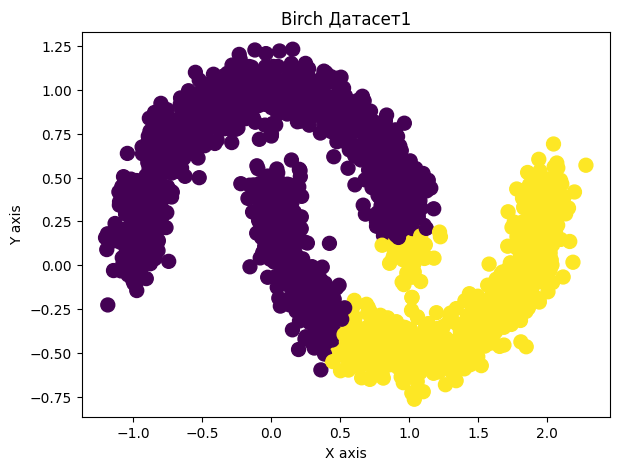

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_birch_1)
plt.title('Birch Датасет1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In [25]:
birch_2 = Birch(n_clusters=2, threshold=0.1, branching_factor=100)
y_birch_2 = birch_2.fit_predict(X2)

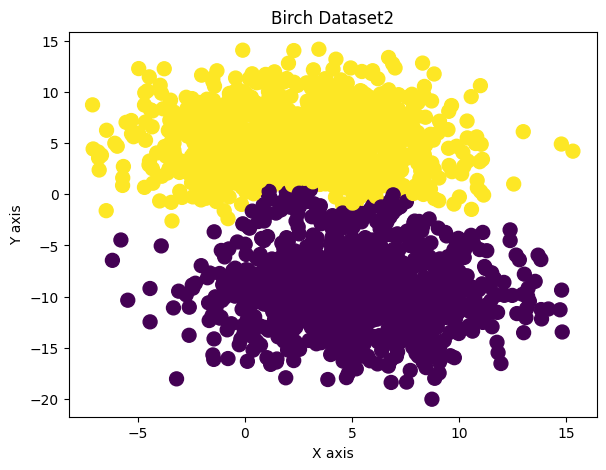

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
plt.scatter(X2[:, 0], X2[:, 1], s=100, c=y_birch_2)
plt.title('Birch Dataset2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In [27]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

silhouette_birch_1 = silhouette_score(X1, y_birch_1)
ari_birch_1 = adjusted_rand_score(Y1, y_birch_1)
nmi_birch_1 = normalized_mutual_info_score(Y1, y_birch_1)

print(f"Birch Датасет 1 - Silhouette Coefficient: {silhouette_birch_1:.3f}")
print(f"Birch Датасет 1 - ARI: {ari_birch_1:.3f}")
print(f"Birch Датасет 1 - NMI: {nmi_birch_1:.3f}")

Birch Датасет 1 - Silhouette Coefficient: 0.458
Birch Датасет 1 - ARI: 0.377
Birch Датасет 1 - NMI: 0.341


In [28]:
silhouette_birch_2 = silhouette_score(X2, y_birch_2)
ari_birch_2 = adjusted_rand_score(Y2, y_birch_2)
nmi_birch_2 = normalized_mutual_info_score(Y2, y_birch_2)

print(f"Birch Датасет 2 - Silhouette Coefficient: {silhouette_birch_2:.3f}")
print(f"Birch Датасет 2 - ARI: {ari_birch_2:.3f}")
print(f"Birch Датасет 2 - NMI: {nmi_birch_2:.3f}")

Birch Датасет 2 - Silhouette Coefficient: 0.576
Birch Датасет 2 - ARI: 0.872
Birch Датасет 2 - NMI: 0.810


# Висновок по кластеризації методом BIRCH і порівняння з попередньою моделлю

## Birch на Датасеті 1:
- **Silhouette Coefficient**: 0.458
- **ARI (Adjusted Rand Index)**: 0.377
- **NMI (Normalized Mutual Information)**: 0.341

### Аналіз результатів:
- **Silhouette Coefficient**: Вказує на помірну якість кластеризації. Є певне перекриття між кластерами, оскільки значення менше 0.5.
- **ARI**: Низький ARI (0.377) показує, що BIRCH не зміг добре розпізнати складну структуру кластерів "місяці". Це свідчить про те, що алгоритм не здатний ефективно розділити класи з нелінійними межами.
- **NMI**: NMI в 0.341 вказує на слабку спільну інформацію між справжніми мітками і передбаченими кластерами. Це означає, що модель не змогла захопити структуру даних.

## Birch на Датасеті 2:
- **Silhouette Coefficient**: 0.576
- **ARI (Adjusted Rand Index)**: 0.872
- **NMI (Normalized Mutual Information)**: 0.810

### Аналіз результатів:
- **Silhouette Coefficient**: Високе значення (0.576) свідчить про те, що кластери добре розділені.
- **ARI**: Високий ARI (0.872) свідчить про те, що BIRCH ефективно відобразив структуру даних і майже ідеально кластеризував дані.
- **NMI**: Високий NMI (0.810) показує, що передбачені кластери зберігають більшість інформації про справжні мітки.

## Порівняння з попередньою моделлю (Agglomerative Clustering)

### Датасет 1:
| Модель                     | Silhouette Coefficient | ARI   | NMI   |
|-----------------------------|------------------------|-------|-------|
| **Agglomerative Clustering** | 0.406                  | 0.716 | 0.671 |
| **Birch**                   | 0.458                  | 0.377 | 0.341 |

- **Agglomerative Clustering** працює краще на Датасеті 1, зокрема, маючи значно вищі значення **ARI** та **NMI**. Це пояснюється тим, що **Agglomerative Clustering** краще справляється з нелінійними межами між кластерами, тоді як **Birch** краще підходить для лінійно розділених або компактних кластерів.

### Датасет 2:
| Модель                     | Silhouette Coefficient | ARI   | NMI   |
|-----------------------------|------------------------|-------|-------|
| **Agglomerative Clustering** | 0.588                  | 0.908 | 0.843 |
| **Birch**                   | 0.576                  | 0.872 | 0.810 |

- Обидві моделі показують схожі результати на Датасеті 2, який має лінійно розділені кластери. Однак **Agglomerative Clustering** має трохи вищі значення **ARI** та **NMI**, що свідчить про те, що вона трохи краще відображає справжню структуру даних. Проте різниця між моделями незначна.

## Висновок:
- **Birch** добре працює на **лінійно розділених кластерах** (Датасет 2), однак має труднощі з кластеризацією **нелінійних структур** (Датасет 1).
- **Agglomerative Clustering** показує кращі результати на обох датасетах, особливо на складних даних з нелінійними межами, таких як Датасет 1.
- Для **лінійно розділених даних** обидві моделі працюють подібно, проте для **нелінійних даних** рекомендується використовувати **Agglomerative Clustering** або інші методи, що краще справляються з такими структурами.


## DBSCAN

In [29]:
from sklearn.cluster import DBSCAN
dbscan_1 = DBSCAN(eps=0.2, min_samples=70)
y_dbscan_1 = dbscan_1.fit_predict(X1)

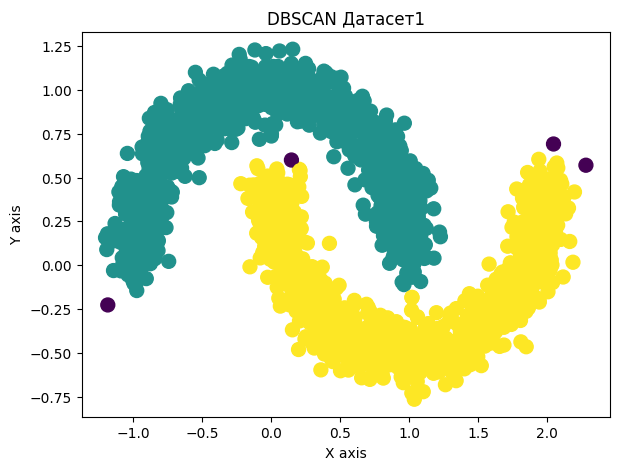

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_dbscan_1)
plt.title('DBSCAN Датасет1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()
inti_point = np.random.randint(0, len(X1)-1, 2 )
medoids=X1[inti_point]

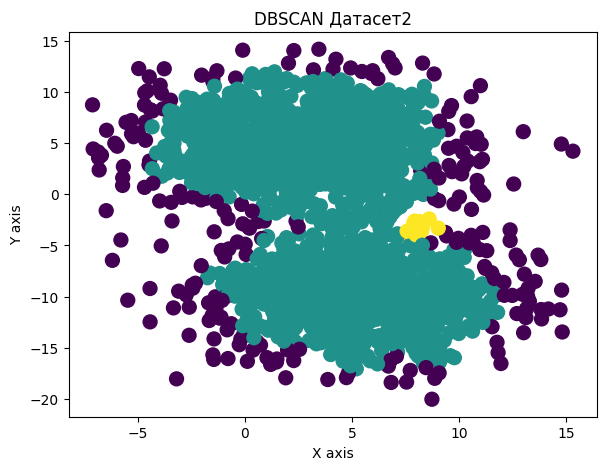

In [31]:
dbscan_2 = DBSCAN(eps=1, min_samples=10)
y_dbscan_2 = dbscan_2.fit_predict(X2)
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
plt.scatter(X2[:, 0], X2[:, 1], s=100, c=y_dbscan_2)
plt.title('DBSCAN Датасет2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()
inti_point = np.random.randint(0, len(X2)-1, 2 )
medoids=X2[inti_point]

In [32]:
silhouette_dbscan_1 = silhouette_score(X1, y_dbscan_1)
ari_dbscan_1 = adjusted_rand_score(Y1, y_dbscan_1)
nmi_dbscan_1 = normalized_mutual_info_score(Y1, y_dbscan_1)
print(f"DBSCAN Датасет 1 - Silhouette Coefficient: {silhouette_dbscan_1}")
print(f"DBSCAN Датасет 1 - ARI: {ari_dbscan_1:.3f}")
print(f"DBSCAN Датасет 1 - NMI: {nmi_dbscan_1:.3f}")

DBSCAN Датасет 1 - Silhouette Coefficient: 0.3010813290557993
DBSCAN Датасет 1 - ARI: 0.992
DBSCAN Датасет 1 - NMI: 0.979


In [33]:
silhouette_dbscan_2 = silhouette_score(X2, y_dbscan_2)
ari_dbscan_2 = adjusted_rand_score(Y2, y_dbscan_2)
nmi_dbscan_2 = normalized_mutual_info_score(Y2, y_dbscan_2)
print(f"DBSCAN Датасет 2 - Silhouette Coefficient: {silhouette_dbscan_2}")
print(f"DBSCAN Датасет 2 - ARI: {ari_dbscan_2:.3f}")
print(f"DBSCAN Датасет 2 - NMI: {nmi_dbscan_2:.3f}")

DBSCAN Датасет 2 - Silhouette Coefficient: -0.16260384238870437
DBSCAN Датасет 2 - ARI: -0.000
DBSCAN Датасет 2 - NMI: 0.002


# Висновок по кластеризації та порівняння моделей (Agglomerative Clustering, BIRCH, DBSCAN)

## Загальний аналіз результатів

### Датасет 1:
| Модель                     | Silhouette Coefficient | ARI   | NMI   |
|-----------------------------|------------------------|-------|-------|
| **Agglomerative Clustering** | 0.406                  | 0.716 | 0.671 |
| **BIRCH**                   | 0.458                  | 0.377 | 0.341 |
| **DBSCAN**                  | 0.301                  | 0.992 | 0.979 |

- **Agglomerative Clustering**:
  - **Silhouette Coefficient**: 0.406 – середній результат, що вказує на досить добре розділені кластери, проте є деяке перекриття.
  - **ARI**: 0.716 – хороше співпадіння з справжніми мітками.
  - **NMI**: 0.671 – кластеризація відображає значну частину структури даних.
  
- **BIRCH**:
  - **Silhouette Coefficient**: 0.458 – помірний результат, що показує трохи краще розділення кластерів, ніж у Agglomerative Clustering.
  - **ARI**: 0.377 – показує, що модель не справляється з нелінійними кластерами.
  - **NMI**: 0.341 – мало збереженої інформації від початкових міток.

- **DBSCAN**:
  - **Silhouette Coefficient**: 0.301 – помірний результат, вказує на деякі труднощі з чітким розділенням кластерів.
  - **ARI**: 0.992 – практично ідеальне співпадіння з справжніми мітками. DBSCAN відмінно розпізнав складну структуру кластерів.
  - **NMI**: 0.979 – DBSCAN добре захоплює інформацію з справжніх міток.

### Датасет 2:
| Модель                     | Silhouette Coefficient | ARI   | NMI   |
|-----------------------------|------------------------|-------|-------|
| **Agglomerative Clustering** | 0.588                  | 0.908 | 0.843 |
| **BIRCH**                   | 0.576                  | 0.872 | 0.810 |
| **DBSCAN**                  | -0.163                 | -0.000 | 0.002 |

- **Agglomerative Clustering**:
  - **Silhouette Coefficient**: 0.588 – добре розділені кластери.
  - **ARI**: 0.908 – дуже добре співпадіння з мітками.
  - **NMI**: 0.843 – відмінне збереження структури даних.

- **BIRCH**:
  - **Silhouette Coefficient**: 0.576 – кластери досить добре розділені, хоча трохи гірше, ніж у Agglomerative Clustering.
  - **ARI**: 0.872 – високе співпадіння з мітками.
  - **NMI**: 0.810 – більшість інформації зберігається.

- **DBSCAN**:
  - **Silhouette Coefficient**: -0.163 – дуже низьке значення, вказує на проблеми з формуванням кластерів.
  - **ARI**: -0.000 – кластеризація не відповідає справжнім міткам.
  - **NMI**: 0.002 – майже відсутнє збереження інформації про мітки.

## Порівняння результатів між моделями:
- **Agglomerative Clustering** показує стабільно хороші результати на обох датасетах. Для **лінійно розділених даних (Датасет 2)**, ця модель показала найвищу точність (Silhouette, ARI та NMI). Вона також досить добре працює з **нелінійними даними (Датасет 1)**, хоча показники трохи гірші через складну структуру кластерів.
  
- **BIRCH** працює **помірно добре на лінійних даних (Датасет 2)**, але **гірше справляється з нелінійними даними (Датасет 1)**. Порівняно з Agglomerative Clustering, BIRCH має трохи нижчі результати на обох датасетах, але незначно відрізняється на Датасеті 2.

- **DBSCAN** показав себе як **найкращий для складних, нелінійних кластерів (Датасет 1)**, отримавши практично ідеальні результати (ARI = 0.992 і NMI = 0.979). Однак, на **лінійно розділених даних (Датасет 2)**, DBSCAN працює дуже погано. Його параметри були неадекватними для цього датасету, і він не зміг виявити кластери належним чином.

## Висновок:
- **Для нелінійних кластерів (Датасет 1)** найкращим алгоритмом є **DBSCAN**, оскільки він краще справляється з складними структурами і ефективно розпізнає кластери в складних конфігураціях.
- **Для лінійно розділених даних (Датасет 2)** **Agglomerative Clustering** і **BIRCH** працюють приблизно на одному рівні, забезпечуючи хороші результати.
- **DBSCAN** не підходить для лінійно розділених або однорідно щільних даних, що видно з його провалу на Датасеті 2.
